<a href="https://colab.research.google.com/github/yaashhnaaa/reinforcement-learning-mini-projects-using-google-colab/blob/main/pendulum_deepQ_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt - get install z11 -utils>/dev/null 2>&1
!pip install pyglet >/dev/null 2>&1
!apt - get install xvfb >/dev/null 2>&1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [3]:
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(env_ids)

['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4']


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


In [4]:
import gym
env = gym.make("Pendulum-v1").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
print("State space:", env.observation_space)
print("Action space:", env.action_space)

State space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action space: Box(-2.0, 2.0, (1,), float32)


In [7]:
import imageio


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
np_actions = env.action_space


In [9]:
np_ovs = env.observation_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from collections import deque


In [18]:
class DQAgent:
    def __init__(self):
        self.state_dim = 3  # Corrected typo: "sate_dim" -> "state_dim"
        self.action_dim = 9
        self.lr = 0.01  # Removed the invalid "A"
        self.gamma = 0.90
        self.tau = 0.01
        self.epsilon = 1.0
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.98
        self.buffer_size = 100000
        self.batch_size = 200
        self.memory = ReplayBuffer(self.buffer_size)

        self.Q = QNetwork(self.state_dim, self.action_dim, self.lr)
        self.Q_target = QNetwork(self.state_dim, self.action_dim, self.lr)
        self.Q_target.load_state_dict(self.Q.state_dict())

    # Define additional methods if needed




In [19]:
class ReplayBuffer:
  def __init__(self, buffer_limit):
    self.buffer = deque(maxlen=buffer_limit)

  def put(self, transiton):
    self.buffer.append(transiton)


In [14]:
import torch.nn as nn

In [23]:
class QNetwork(nn.Module):  # Ensure you import nn from torch
    def __init__(self, state_dim, action_dim, lr):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc_out = nn.Linear(32, action_dim)

        self.lr = lr  # Use the passed lr argument instead of undefined q_lr
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc_out(x)


In [24]:
import torch.optim as optim

In [25]:
agent = DQAgent()

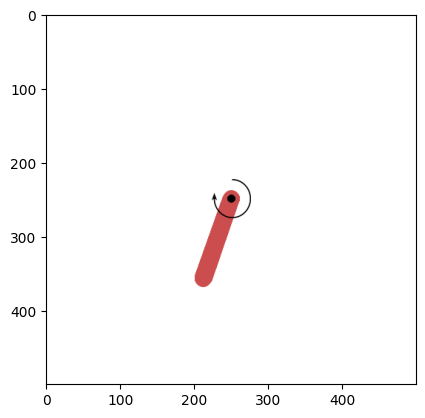

In [ ]:
import pygame
env.reset()
pygame.init()
prev_screen =env.render(mode = 'rgb_array')
plt.imshow(prev_screen)

for i_episodes_2 in range(10001):
  action = env.reset()
  agent, reward, done, info = env.step(action)
  screen= env.render(mode = 'rgb_array')
  plt.imshow(screen)

  ipythondisplay.clear_output(wait = True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait = True)
env.close()


ipythondisplay.clear_output(wait = True)
env.close()

